# Lab 2.01 - Australian Athletes (ais)

Import all necessary Python libraries and load the AIS dataset from lab exercise 1.01. Also include the code for setting the index and conversion to categorical variables!

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def set_index(df, index):
    df.set_index(index, inplace=True)
    return df

def convert_to_cat(df, cols):
    for col in cols:
        df[col] = df[col].astype('category')
    return df


df = pd.read_csv('../data/ais.csv')

set_index(df, 'id')
convert_to_cat(df, ['sex', 'sport'])

df.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
id,,,,,,,,,,,,,
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   rcc     202 non-null    float64 
 1   wcc     202 non-null    float64 
 2   hc      202 non-null    float64 
 3   hg      202 non-null    float64 
 4   ferr    202 non-null    int64   
 5   bmi     202 non-null    float64 
 6   ssf     202 non-null    float64 
 7   pcBfat  202 non-null    float64 
 8   lbm     202 non-null    float64 
 9   ht      202 non-null    float64 
 10  wt      202 non-null    float64 
 11  sex     202 non-null    category
 12  sport   202 non-null    category
dtypes: category(2), float64(10), int64(1)
memory usage: 19.8 KB


Use an appropriate chart type to visualise the following variables. Are several chart types suitable? Make one of each! Note how some graphs nevertheless give a better insight into the data than other types of graphs.

- `sex`
- `sport`
- `ht` (show this also divided by `sex` and by `sport`.)

In [56]:
df['sport'].unique()

['B_Ball', 'Row', 'Netball', 'Swim', 'Field', 'T_400m', 'T_Sprnt', 'Tennis', 'Gym', 'W_Polo']
Categories (10, object): ['B_Ball', 'Field', 'Gym', 'Netball', ..., 'T_400m', 'T_Sprnt', 'Tennis', 'W_Polo']

<Axes: xlabel='count', ylabel='sex'>

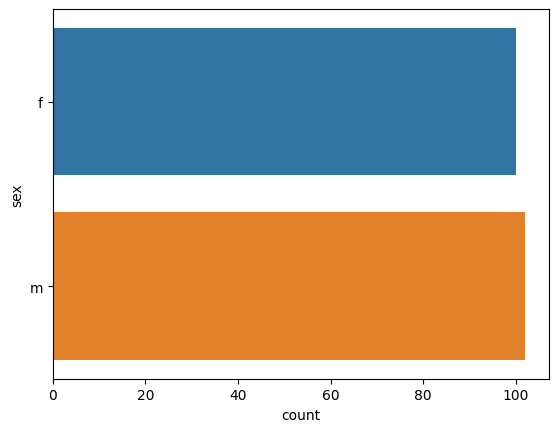

In [138]:
sns.countplot(y='sex', data=df)
# make it horizontal


<Axes: xlabel='count', ylabel='sport'>

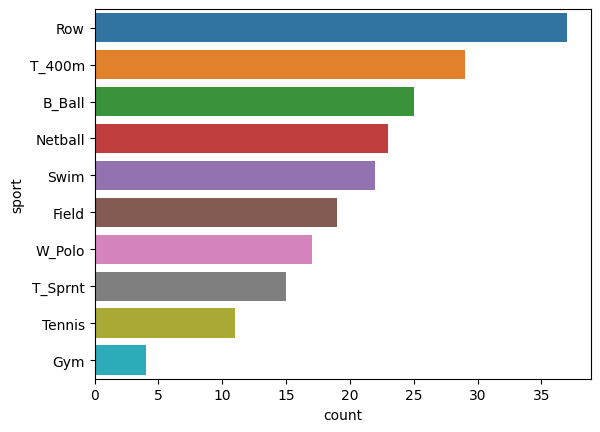

In [140]:
sns.countplot(y='sport', data=df, order=df['sport'].value_counts().index)

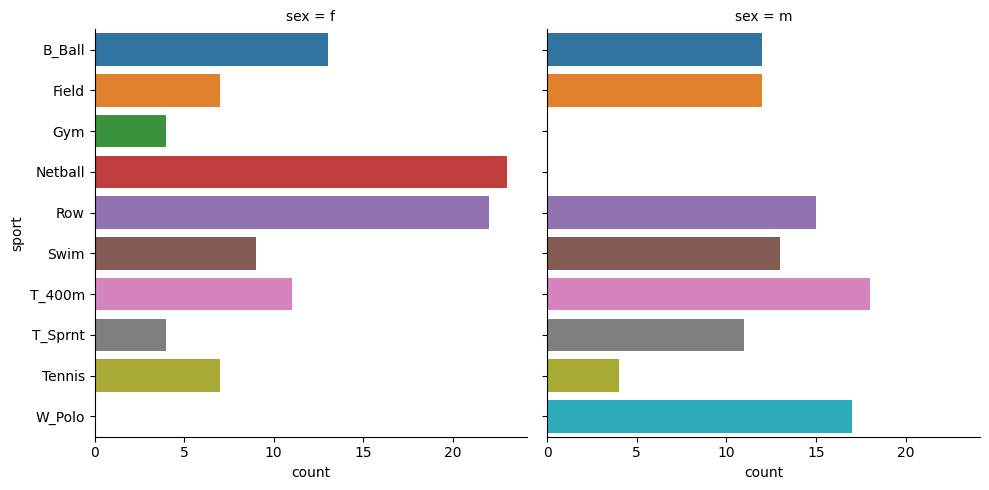

In [143]:
sns.catplot(data=df, kind='count', col='sex', y='sport')

<Axes: xlabel='ht', ylabel='sport'>

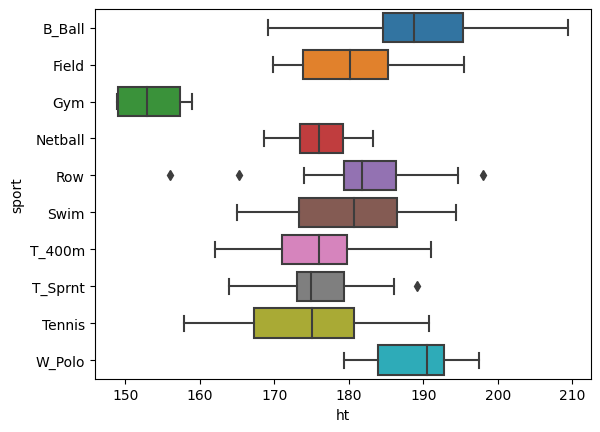

In [145]:
sns.boxplot(data=df, x='ht', y='sport')

<Axes: xlabel='ht', ylabel='Density'>

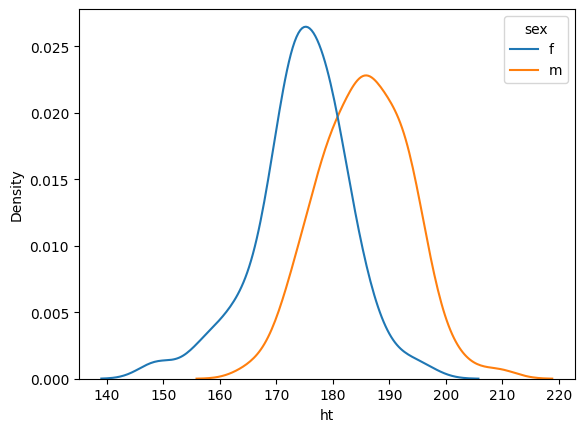

In [148]:
sns.kdeplot(data=df, x='ht', hue='sex')

<Axes: xlabel='ht', ylabel='sex'>

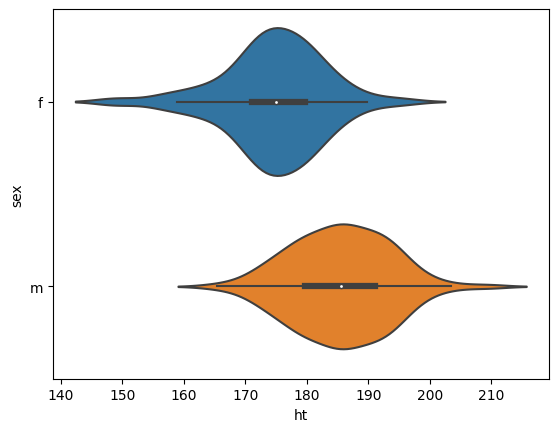

In [149]:
sns.violinplot(data=df, x='ht', y='sex')

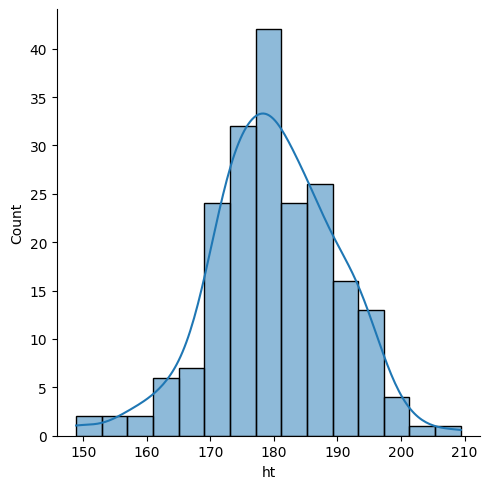

In [150]:
sns.displot(data=df, x='ht', kde=True)

<Axes: xlabel='ht', ylabel='Density'>

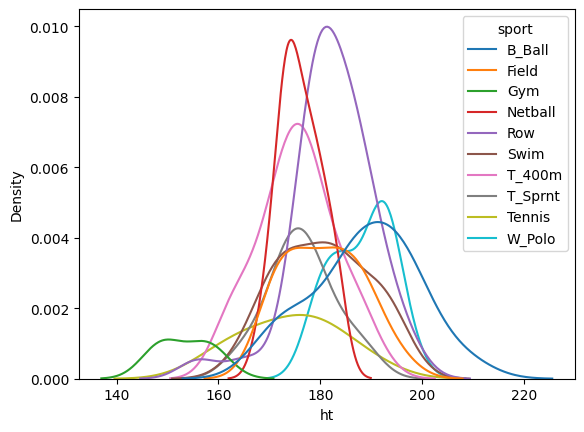

In [151]:
sns.kdeplot(data=df, x='ht', hue='sport')

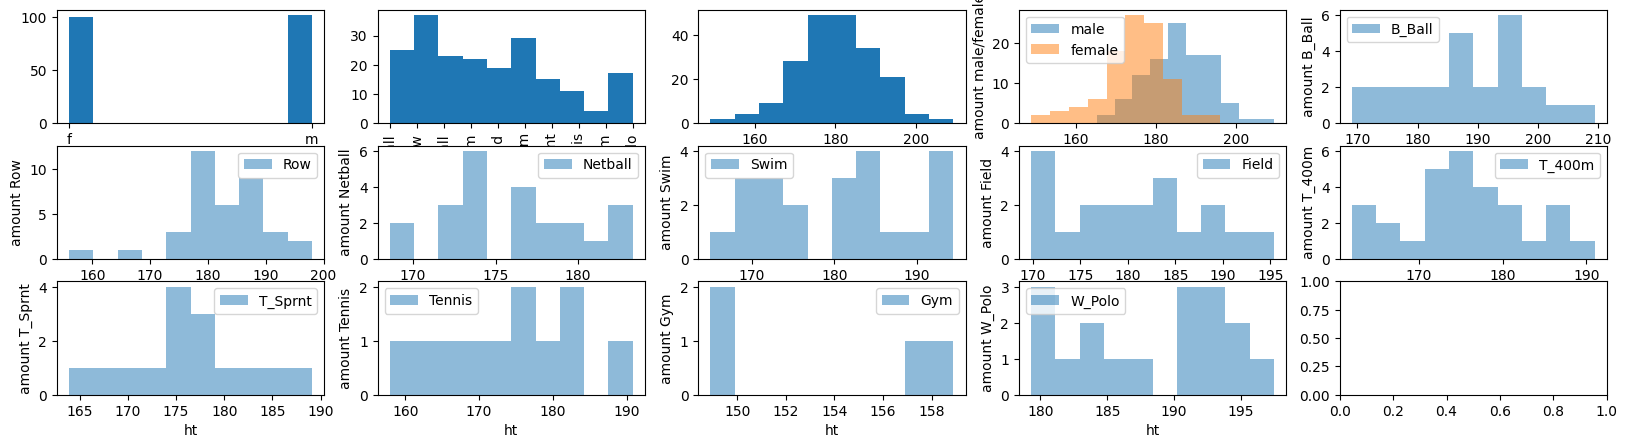

In [68]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20, 5))

ax[0, 0].hist(df['sex'])

ax[0, 1].hist(df['sport'])
ax[0, 1].tick_params(axis='x', labelrotation=90)

ax[0, 2].hist(df['ht'])
ax[0, 2].set_xlabel('ht')

hulp_m = df[df['sex'] == 'm']['ht']
hulp_f = df[df['sex'] == 'f']['ht']

ax[0, 3].hist(hulp_m, alpha=0.5, label='male')
ax[0, 3].hist(hulp_f, alpha=0.5, label='female')
ax[0, 3].legend()
ax[0, 3].set_ylabel('amount male/female')
ax[0, 3].set_xlabel('ht')

rowcount = 0
colcount = 4

for sport in df['sport'].unique():

    hulp_sport = df[df['sport'] == sport]['ht']
    ax[rowcount, colcount].hist(hulp_sport, alpha=0.5, label=sport)
    ax[rowcount, colcount].legend()
    ax[rowcount, colcount].set_ylabel(f'amount {sport}')
    ax[rowcount, colcount].set_xlabel('ht')

    colcount += 1
    if colcount == 5:
        rowcount += 1
        colcount = 0


Select the following subsets from the dataset and calculate for each the appropriate measures of central tendency (and, when possible, dispersion) of the variables `ht` and `sex`:

1. the rowers
2. the rowers, netball and tennis players together
3. the female basketball players and rowers together

In [133]:
fem_rowers = df[df['sport'] == 'Row']['sex'] == 'f'
print(fem_rowers.value_counts()[0])
print(fem_rowers.value_counts()[1])
print(df[df['sport'] == 'Row']['sex'].mode()[0])
print("\n")

fem_tennis = df[df['sport'] == 'Tennis']['sex'] == 'f'
fem_netball = df[df['sport'] == 'Netball']['sex'] == 'f'
fem_rnt = fem_tennis.value_counts()[0] + fem_netball.value_counts()[0] + fem_rowers.value_counts()[0]
male_rnt = fem_tennis.value_counts()[1] + fem_rowers.value_counts()[1]

if fem_rnt > male_rnt:
    mode_rnt = 'f'
else:
    mode_rnt = 'm'

print(fem_rnt)
print(male_rnt)
print(mode_rnt)
print("\n")

fem_bask = df[df['sport'] == 'B_Ball']['sex'] == 'f'
fem_bask_row = fem_bask.value_counts()[0] + fem_rowers.value_counts()[0]
print(fem_bask_row)
print(0)
print('f')

22
15
f


52
19
f


35
0
f


Kan ook zo

In [165]:
row = df[df.sport == 'Row']
row_net_tennis = df[df.sport.isin(['Row', 'Netball', 'Tennis'])]
f_basket_row = df[(df.sex == 'f') & ((df.sport == 'B_Ball') | (df.sport == 'Row'))]

print(row.sex.value_counts())
print("\n")
print(row_net_tennis.sex.value_counts())
print("\n")
print(f_basket_row.sex.value_counts())
print("\n")
print(row.sex.mode()[0])
print("\n")
print(row_net_tennis.sex.mode()[0])
print("\n")
print(f_basket_row.sex.mode()[0])
print("\n")

sex
f    22
m    15
Name: count, dtype: int64


sex
f    52
m    19
Name: count, dtype: int64


sex
f    35
m     0
Name: count, dtype: int64


f


f


f




In [175]:
print(f"{row['ht'].mean().__round__(3)}\n")
print(f"{row['ht'].std().__round__(3)}\n")
print(f"{row['ht'].min()}\n")
print(f"{row['ht'].quantile(0.25).__round__(1)}\n")
print(f"{row['ht'].median().__round__(1)}\n")
print(f"{row['ht'].quantile(0.75).__round__(1)}\n")
print(f"{row['ht'].max()}\n")
print(f"{row['ht'].quantile(0.75) - row['ht'].quantile(0.25)}\n")

182.376

7.798

156.0

179.3

181.8

186.3

198.0

7.0



In [177]:
print(f"{row_net_tennis['ht'].mean().__round__(3)}\n")
print(f"{row_net_tennis['ht'].std().__round__(3)}\n")
print(f"{row_net_tennis['ht'].min()}\n")
print(f"{row_net_tennis['ht'].quantile(0.25).__round__(1)}\n")
print(f"{row_net_tennis['ht'].median().__round__(1)}\n")
print(f"{row_net_tennis['ht'].quantile(0.75).__round__(1)}\n")
print(f"{row_net_tennis['ht'].max()}\n")
print(f"{row_net_tennis['ht'].quantile(0.75) - row_net_tennis['ht'].quantile(0.25)}\n")

179.066

7.936

156.0

174.2

179.5

183.4

198.0

9.150000000000006



In [178]:
print(f"{f_basket_row['ht'].mean().__round__(3)}\n")
print(f"{f_basket_row['ht'].std().__round__(3)}\n")
print(f"{f_basket_row['ht'].min()}\n")
print(f"{f_basket_row['ht'].quantile(0.25).__round__(1)}\n")
print(f"{f_basket_row['ht'].median().__round__(1)}\n")
print(f"{f_basket_row['ht'].quantile(0.75).__round__(1)}\n")
print(f"{f_basket_row['ht'].max()}\n")
print(f"{f_basket_row['ht'].quantile(0.75) - f_basket_row['ht'].quantile(0.25)}\n")

180.126

7.144

156.0

177.4

179.7

184.6

195.9

7.249999999999972



## Check your answers

As a check, here are the results of the last question. First the frequencies and mode of the variable `sex`:

|           | Selection 1 | Selection 2 | Selection 3 |
| :-------- | :---------- | :---------- | :---------- |
| **f**     | 22          | 52          | 35          |
| **m**     | 15          | 19          | 0           |
| **mode**  | f           | f           | f           |

Then the relevant measures for central tendency and dispersion for `ht` (max. 3 decimal places):

| Statistic  | Selection 1 | Selection 2 | Selection 3 |
| :--------- | :---------- | :---------- | :---------- |
| mean       | 182.376     | 179.066     | 180.126     |
| stdev      | 7.798       | 7.936       | 7.144       |
| min        | 156         | 156         | 156         |
| Q1         | 179.3       | 174.25      | 177.4       |
| median     | 181.8       | 179.5       | 179.7       |
| Q3         | 186.3       | 183.4       | 184.65      |
| max        | 198         | 198         | 195.9       |
| IQR        | 7           | 9.15        | 7.250       |